In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import xlrd.xldate as xd
import matplotlib.ticker
import matplotlib.dates

m0_attendance = pd.read_excel("Attendance_spreadsheets/Fall2017/Meeting[0]2017_Attendance.xlsx", header=0)
m1_attendance = pd.read_excel("16-17_PH_Attendance_Sheets/Meeting[1]S2017-report.xlsx")

fall_ahs_attendance = pd.read_excel("Attendance_spreadsheets/Fall2017/AHSFall2017_Attendance.xlsx", header=0)
spring_ahs_attendance = pd.read_excel("Attendance_spreadsheets/AtlHackersSocial_4.14.17.xlsx")

slack_stats = pd.read_excel("Slack_Data/Sept_Slack_Stats.xlsx", header=0)


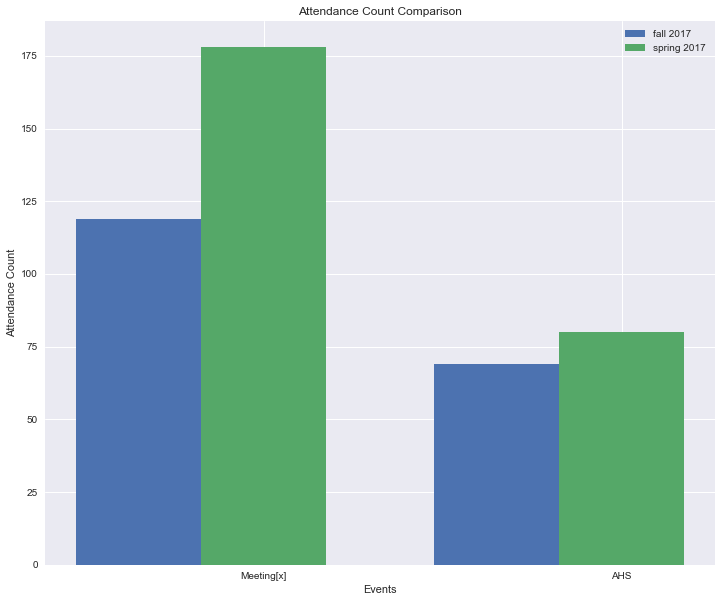

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)


m_array = np.array([['Meeting[x]','spring 2017',len(m1_attendance)],
                    ['Meeting[x]','fall 2017',len(m0_attendance)],
                    ['AHS','spring 2017',len(spring_ahs_attendance)],
                    ['AHS','fall 2017',len(fall_ahs_attendance)]])
space = 0.3

u, idx = np.unique(m_array[:,0], return_index=True)
events = u[np.argsort(idx)]
semesters = np.unique(m_array[:,1])

n = len(events)

width = (1 - space) / (len(events))

for i, semester in enumerate(semesters):
    indeces = range(1,len(events)+1)
    vals = m_array[m_array[:,1] == semester][:,2]
    pos = [j - (1 - space) / 2. + i * width 
           for j in indeces]
    ax.bar(pos, vals, width=width)


ax.set_title("Attendance Count Comparison")
ax.set_xticks(indeces)
ax.set_xticklabels(events)
ax.set_ylabel("Attendance Count")
ax.set_xlabel("Events")
ax.legend(semesters, loc='upper right')
    
plt.show()

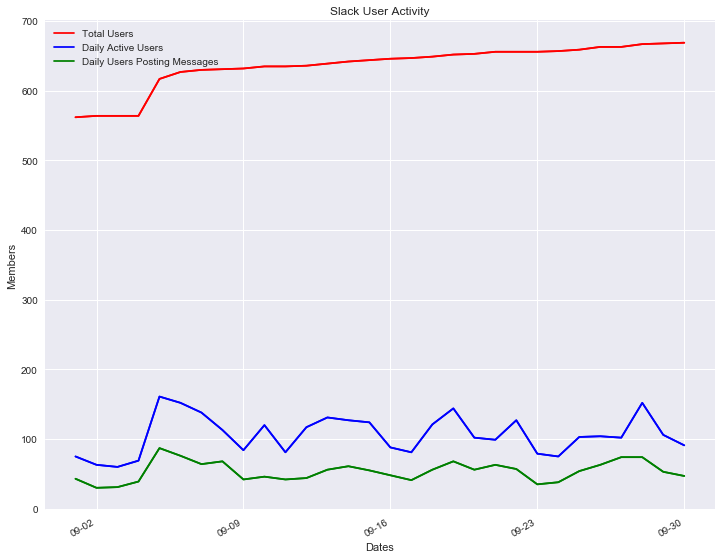

In [20]:
plt.xlabel('Dates')
plt.ylabel('Members')

for i, row in slack_stats.iterrows():
    row['Date'] = row['Date'].to_pydatetime()

plt.plot(slack_stats['Date'], slack_stats['Total Users'], color='red')
plt.plot(slack_stats['Date'], slack_stats['Daily Active Users'], color='blue')
plt.plot(slack_stats['Date'], slack_stats['Daily Users Posting Messages'], color='green')

plt.legend(['Total Users', 'Daily Active Users', 'Daily Users Posting Messages'], loc='upper left')

plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m-%d"))
plt.gcf().autofmt_xdate()

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.title("Slack User Activity")
plt.show()

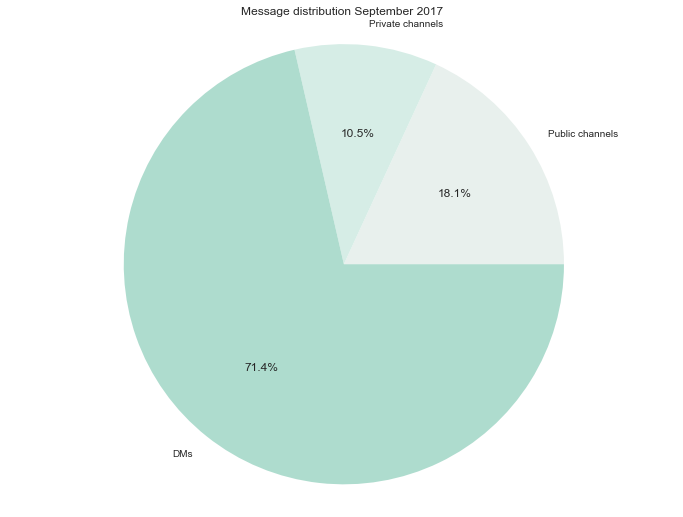

In [9]:
public_msg = 0
private_msg = 0
DMs = 0

for i, row in slack_stats.iterrows():
    public_msg += row['Messages in Public Channels']
    private_msg += row['Messages in Private Channels']
    DMs += row['Messages in DMs']
    
labels = 'Public channels', 'Private channels', 'DMs'
slices = [public_msg, private_msg, DMs]
colors = ['#e8f0ed','#d6ede6', '#aedcce']

plt.title("Message distribution September 2017")
plt.pie(x=slices, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

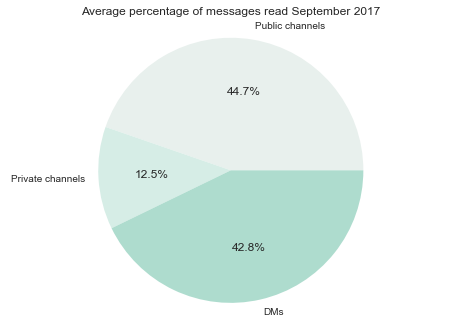

In [6]:
public_msg_read = slack_stats.iloc[:,15].mean()
private_msg_read = slack_stats.iloc[:,16].mean()
DMs_read = slack_stats.iloc[:,17].mean()
    
labels = 'Public channels', 'Private channels', 'DMs'
slices = [public_msg_read, private_msg_read, DMs_read]
colors = ['#e8f0ed','#d6ede6', '#aedcce']

plt.title("Average percentage of messages read September 2017")
plt.pie(x=slices, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()